In [3]:
import pandas as pd
import datetime

In [4]:
def prepare_row(raw_to_column):
    retRow = {}
    for key in raw_to_column.keys():
        retRow[raw_to_column[key]] = None
    return retRow

def read_file(path_to_file):
    """
        Function that reads .txt file on the given path and transforms it to pandas DataFrame. It's assumed that
        an empty line is a separator between entries in the file.
        Usage example:
            df = read_file("datasets/MatchedData/ratings_ba.txt")
            df.head()
    """
    
    f = open(path_to_file, "r", encoding = 'utf8')
    
    lines = f.readlines()
    
    raw_to_column = {"beer_name" : "Beer Name", "beer_id" : "Beer Id", "style" : "Style", "brewery_name" : "Brewery Name", "brewery_id" : "Brewery Id", "abv" : "Abv", "date" : "Date", "user_name" : "Username", "user_id" : "User Id", "appearance" : "Appearance", "palate" : "Palate", "taste" : "Taste", 'aroma' : 'Aroma', "overall" : "Overall", "rating" : "Rating", "text" : "Text", "review" : "Review"}
    
    #Preparing the dictionary for reading the next entry
    newRow = prepare_row(raw_to_column)
    
    dataFrameDict = {'Beer Name' : [], 'Beer Id' : [], 'Brewery Name' : [], 'Brewery Id' : [], 'Style' : [], 'Abv' : [], 'Date' : [], 'Username' : [], 'User Id' : [],'Appearance' : [], 'Aroma' : [],'Palate' : [],'Taste' : [],'Overall' : [],'Rating' : [],'Text' : [],'Review' : []}
    
    for line in lines:
        
        delim = line.find(":")
        
        if ':' not in line: #No delimiter found <=> empty line found <=> current entry has ended
            for key in newRow.keys():
                dataFrameDict[key].append(newRow[key])
            newRow = prepare_row(raw_to_column)
        else:
            key = line[:delim]
            val = line[delim+1:-1].strip()
            # Following lines are just converting the value to the corresponding data type
            if key == 'date':
                try:
                    newRow[raw_to_column[key]] = datetime.datetime.fromtimestamp(int(val))
                except:
                    newRow[raw_to_column[key]] = None
            else:
                if key == 'beer_id' or key == 'brewery_id':
                    try:
                        newRow[raw_to_column[key]] = int(val)
                    except:
                        newRow[raw_to_column[key]] = None
                else:
                    if key == 'abv' or key == 'appearance' or key =='aroma' or key == 'palate' or key == 'taste' or key == 'overall' or key =='rating':
                        try:
                            newRow[raw_to_column[key]] = float(val)
                        except:
                            newRow[raw_to_column[key]] = None
                    else:
                        if key == 'review':
                            try:
                                newRow[raw_to_column[key]] = bool(val)
                            except:
                                newRow[raw_to_column[key]] = None
                        else:
                            newRow[raw_to_column[key]] = val
                    
    #If file doesn't end with an empty line
    if len(newRow) != 0:
        for key in newRow.keys():
            dataFrameDict[key].append(newRow[key])
    
    df = pd.DataFrame(dataFrameDict)
    #Pandas will cast these values to float by default - because NaN's exist
    df['Beer Id'] = df['Beer Id'].astype(pd.Int64Dtype())
    df['Brewery Id'] = df['Brewery Id'].astype(pd.Int64Dtype())
    
    return df

In [5]:
df = read_file("datasets/BeerAdvocate/reviews.txt")

In [6]:
df.shape

(2589587, 17)

In [8]:
df[df['Beer Name']=='Barelegs Brew']

,Beer Name,Beer Id,Brewery Name,Brewery Id,Style,Abv,Date,Username,User Id,Appearance,Aroma,Palate,Taste,Overall,Rating,Text,Review
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 12:00:00,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,None
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 12:00:00,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",None
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 12:00:00,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,None
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 12:00:00,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",None


In [7]:
df.head()

,Beer Name,Beer Id,Brewery Name,Brewery Id,Style,Abv,Date,Username,User Id,Appearance,Aroma,Palate,Taste,Overall,Rating,Text,Review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 12:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",None
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 12:00:00,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,None
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 12:00:00,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",None
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 12:00:00,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,None
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 12:00:00,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",None


In [6]:
df.to_pickle('ba_ratings.pkl')

In [8]:
df.nunique()

Beer Name        211159
Beer Id          247982
Brewery Name      13440
Brewery Id        13624
Style               104
Abv                 843
Date               6135
Username         153704
User Id          153704
Appearance           17
Aroma                17
Palate               17
Taste                17
Overall              17
Rating              401
Text            2708662
Review                1
dtype: int64

In [9]:
df2 = pd.read_pickle('ba_ratings.pkl')

In [10]:
df2.shape

(8393033, 17)

In [11]:
df3 = read_file("datasets/BeerAdvocate/reviews.txt")

In [12]:
df3.shape

(2589587, 17)

In [13]:
df3.to_pickle('ba_reviews.pkl')

In [14]:
df3.head()

,Beer Name,Beer Id,Brewery Name,Brewery Id,Style,Abv,Date,Username,User Id,Appearance,Aroma,Palate,Taste,Overall,Rating,Text,Review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 12:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with...",None
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 12:00:00,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quick...,None
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 12:00:00,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....",None
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 12:00:00,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wi...,None
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 12:00:00,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy...",None


In [15]:
df3.nunique()

Beer Name        145235
Beer Id          166649
Brewery Name      11817
Brewery Id        11968
Style               104
Abv                 751
Date               6117
Username          62252
User Id           62252
Appearance           17
Aroma                17
Palate               17
Taste                17
Overall              17
Rating              401
Text            2587999
Review                0
dtype: int64

In [20]:
df3.columns

Index(['Beer Name', 'Beer Id', 'Brewery Name', 'Brewery Id', 'Style', 'Abv',
       'Date', 'Username', 'User Id', 'Appearance', 'Aroma', 'Palate', 'Taste',
       'Overall', 'Rating', 'Text', 'Review'],
      dtype='object')

In [41]:
df3['Style'][31]

' English Pale Ale'

In [46]:
df3.isna().sum()

Beer Name             1
Beer Id               1
Brewery Name          1
Brewery Id            1
Style                 1
Abv               65984
Date                  1
Username              1
User Id               1
Appearance        32010
Aroma             32010
Palate            32010
Taste             32010
Overall           32010
Rating                1
Text                  1
Review          2589587
dtype: int64

In [47]:
df4 = df3.groupby('Beer Name')

In [59]:
counter = 0
for beer_name, group in df4:
    if group.count()['Date'] > 365:
        counter = counter+1

print(counter)

1264


In [63]:
df5 = df3.groupby('Beer Name').count()['Date']

In [64]:
df5[df5 > 365]

Beer Name
 #9                                                 1703
 10 Commandments                                     381
 120 Minute IPA                                     2324
 1554 Black Lager                                   1376
 15th Anniversary Escondidian Imperial Black IPA     718
                                                    ... 
 Zombie Dust                                        1571
 Zywiec Beer                                         394
 Zywiec Porter                                       421
 §ucaba                                              884
 Éphémère (Apple)                                   1016
Name: Date, Length: 1264, dtype: int64

In [99]:
df6 = df3[df3['Beer Name'] == ' 120 Minute IPA']

In [66]:
df6.shape

(394, 17)

In [67]:
import seaborn as sns


In [106]:
a = datetime.datetime.strptime("1/1/07", "%m/%d/%y")

In [107]:
b = datetime.datetime.strptime("12/31/07", "%m/%d/%y")

<AxesSubplot:xlabel='Date', ylabel='Rating'>

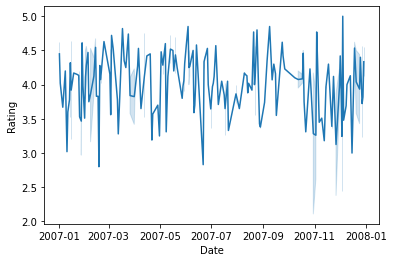

In [108]:
sns.lineplot(data = df6[(df6['Date'] > a) & (df6['Date']< b)], x='Date', y='Rating')

In [76]:
df6.sort_values('Rating', ascending=False)

,Beer Name,Beer Id,Brewery Name,Brewery Id,Style,Abv,Date,Username,User Id,Appearance,Aroma,Palate,Taste,Overall,Rating,Text,Review
410151,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2012-08-09 12:00:00,TSJ4000,tsj4000.661790,4.5,4.5,5.00,5.00,5.0,4.85,Had this one on tap at a Polish festival in O...,None
410124,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2013-09-17 12:00:00,dreamchaser,dreamchaser.751314,4.5,4.5,4.25,4.75,4.5,4.58,"A bubbly, consistent white head with a very b...",None
410104,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2014-11-11 12:00:00,FredVanderNaald,fredvandernaald.891186,NaN,NaN,NaN,NaN,NaN,4.50,I like this beer it has a little bitter taste...,None
410161,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2012-04-26 12:00:00,Moose_Knuckle_Sandwich,moose_knuckle_sandwich.674120,4.5,4.5,4.50,4.50,4.5,4.50,This beer is awesome from the tap in Poland. ...,None
410347,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2007-11-22 12:00:00,Ryan805Beer,ryan805beer.171365,4.5,4.0,4.50,4.50,4.5,4.38,"Zywiec- Poland, 1pt .09floz, Alc. 5.6% Vol.A ...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410370,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2007-02-13 12:00:00,yelterdow,yelterdow.3535,3.0,1.5,2.00,1.50,1.5,1.64,Served at fridge temperature in a pilsner gla...,None
410408,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2005-07-06 12:00:00,paterlodie,paterlodie.8814,3.5,1.5,1.50,1.50,1.0,1.52,BB 10-4-06. Good poorout with lasting head an...,None
410130,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2013-07-13 12:00:00,dacrza1,dacrza1.128778,2.0,1.0,2.25,1.50,1.5,1.49,"Date tasted: July 12, 2013... Glassware: Balt...",None
410168,Zywiec Beer,1666,Zywiec Breweries PLC (Heineken),623,Euro Pale Lager,5.6,2012-01-29 12:00:00,korguy123,korguy123.220565,3.0,1.0,3.00,1.00,1.5,1.42,"No date, no freshness info.A- Super clear, li...",None
